In [5]:
! pip install -q qiskit
! pip install -q qiskit-aer
! pip install -q qiskit-algorithms
! pip install -q qiskit-nature
! pip install -q qiskit-nature-pyscf # install the pyscf library
! pip install -q qiskit-ibm-runtime
# print(qiskit.__version__)
# print(qiskit_aer.__version__)
# print(qiskit_algorithms.__version__)
# print(qiskit_nature.__version__)
# print(qiskit_nature_pyscf.__version__)
# print(qiskit_ibm_runtime.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8

In [6]:
import qiskit_nature
import qiskit
import qiskit_aer
import qiskit_algorithms
import qiskit_ibm_runtime
import qiskit_nature_pyscf
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit.circuit.library import EfficientSU2
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_aer import  AerSimulator
# from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_algorithms.optimizers import SLSQP
from qiskit_aer.primitives import Estimator
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.problems import ElectronicBasis
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.second_q.mappers import ParityMapper
from scipy.linalg import eigh
from qiskit_nature.second_q.circuit.library import HartreeFock
from scipy.linalg import expm
from qiskit.quantum_info import Statevector
from numpy import pi

# Analysis of Li atom in 10 spin orbitals:

In [62]:
mdriver = PySCFDriver(
    atom="Li 0.0 0.0 0.0",  # Specify the atom and its coordinates
    basis="sto3g",          # Define the basis set
    charge=0,                # Set the charge of the atom
    spin=1,                 # Set the spin of the atom
    unit=DistanceUnit.ANGSTROM, # Define the unit of the coordinates
)

# You can now use the driver to run a calculation
electronic_structure_problem = mdriver.run()

In [63]:
print("Spatial orbitals:", electronic_structure_problem.num_spatial_orbitals)
print("Number of up spin: ", electronic_structure_problem.num_alpha)
print("Number of down spin: ", electronic_structure_problem.num_beta)
print("\n")
print("Down spin configuration : ", electronic_structure_problem.orbital_occupations_b)
print("Down spin configuration : ",electronic_structure_problem.orbital_occupations)
print("Number of particles: ", electronic_structure_problem.num_particles)
# print(electronic_structure_problem.second_q_ops()[0])

Spatial orbitals: 5
Number of up spin:  2
Number of down spin:  1


Down spin configuration :  [1. 0. 0. 0. 0.]
Down spin configuration :  [1. 1. 0. 0. 0.]
Number of particles:  (2, 1)


In [64]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper

solver = GroundStateEigensolver(
    JordanWignerMapper(),
    NumPyMinimumEigensolver(),
)

result = solver.solve(electronic_structure_problem)
print(result)
print("HF energy : ", electronic_structure_problem.reference_energy)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -7.315836552851
  - computed part:      -7.315836552851
~ Nuclear repulsion energy (Hartree): 0.0
> Total ground state energy (Hartree): -7.315836552851
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: -0.427
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.0]
    - computed part:      [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 
HF energy :  -7.315525981281089


In [80]:
mapper = JordanWignerMapper()
qubit_hamiltonian = mapper.map(electronic_structure_problem.second_q_ops()[0])
state = HartreeFock(electronic_structure_problem.num_spatial_orbitals, electronic_structure_problem.num_particles, mapper)
print(state)

     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────
          
q_8: ─────
          
q_9: ─────
          


In [81]:
statevector = Statevector(state)
k = 5
E_sub = np.zeros((k, k), dtype=complex)
S_sub = np.zeros((k, k), dtype=complex)
for i in range(k):
    for j in range(k):
        U = expm(-(i-j)*pi*1j*qubit_hamiltonian/0.085)

        # Apply the unitary operator to the statevector using evolve()
        evolved_statevector = statevector.evolve(U)

        # Now you can access the data of the evolved statevector
        S_sub[i, j] = statevector.expectation_value(U)

        # Now apply hamiltonian to evolved state
        evolved_statevector = evolved_statevector.evolve(qubit_hamiltonian)
        E_sub[i, j] = statevector.inner(evolved_statevector)

print(E_sub)
print(S_sub)


[[-7.31552598+0.j         -7.14523212+1.56621826j -6.64441819+3.05861046j
  -5.83626182+4.41044661j -4.75619586+5.55769654j]
 [-7.14523212-1.56621826j -7.31552598+0.j         -7.14523212+1.56621826j
  -6.64441819+3.05861046j -5.83626182+4.41044661j]
 [-6.64441819-3.05861046j -7.14523212-1.56621826j -7.31552598+0.j
  -7.14523212+1.56621826j -6.64441819+3.05861046j]
 [-5.83626182-4.41044661j -6.64441819-3.05861046j -7.14523212-1.56621826j
  -7.31552598+0.j         -7.14523212+1.56621826j]
 [-4.75619586-5.55769654j -5.83626182-4.41044661j -6.64441819-3.05861046j
  -7.14523212-1.56621826j -7.31552598+0.j        ]]
[[1.        +0.j         0.9766716 -0.21411002j 0.90820705-0.41805525j
  0.79777859-0.60287216j 0.65009961-0.75971331j]
 [0.9766716 +0.21411002j 1.        +0.j         0.9766716 -0.21411002j
  0.90820705-0.41805525j 0.79777859-0.60287216j]
 [0.90820705+0.41805525j 0.9766716 +0.21411002j 1.        +0.j
  0.9766716 -0.21411002j 0.90820705-0.41805525j]
 [0.79777859+0.60287216j 0.908

In [83]:
def regularize_matrix(matrix, epsilon=1e-10):
    matrix += epsilon * np.eye(matrix.shape[0])
    return matrix
S_sub = regularize_matrix(S_sub)

eigenvalues, eigenvectors = eigh(E_sub, S_sub)
print(eigenvalues)
print(eigenvectors)
# print(eigenvalues[0]- eigenvalues[1])

[-7.31583655 -5.28870908 -4.98727736 -1.83885172  0.01163877]
[[-3.15240879e-01-4.14863141e-01j  5.99088098e+01-9.21299517e+01j
  -1.63108060e+01+9.67232641e+00j -5.57584998e+01-3.80288654e+01j
   2.92842150e+04+3.27256565e+01j]
 [-1.08388625e-01-5.99091598e-02j  2.69267204e+01+1.19130860e+01j
   1.58851924e+01-1.84715674e+01j -2.10957044e+01+7.89950290e+01j
  -4.78495113e+04-2.32890201e+04j]
 [-1.20068368e-01-5.52750999e-02j  6.99988740e+00+3.70460829e+01j
   1.01034625e+01+1.94844662e+01j  4.97578758e+01+5.54551032e+01j
   3.03701793e+04+4.14069311e+04j]
 [-1.15994681e-01-4.33877772e-02j -2.07235079e+01+2.09166425e+01j
  -2.42500284e+01+2.34006778e+00j  8.08112424e+01-1.24425246e+01j
  -7.83798451e+03-5.26357311e+04j]
 [-5.20164800e-01+3.02744434e-02j -8.93943974e+01-6.39189797e+01j
   1.73034909e+01-7.75796017e+00j -3.17858123e+01-5.95388597e+01j
  -8.76650707e+03+2.79412719e+04j]]


In [84]:
exact_eva, exact_eve = eigh(qubit_hamiltonian.to_matrix())
print(exact_eva)

[-7.31583655e+00 -7.31583655e+00 -7.25379126e+00 ... -4.90501018e-01
  1.38777878e-15  3.77428002e-01]


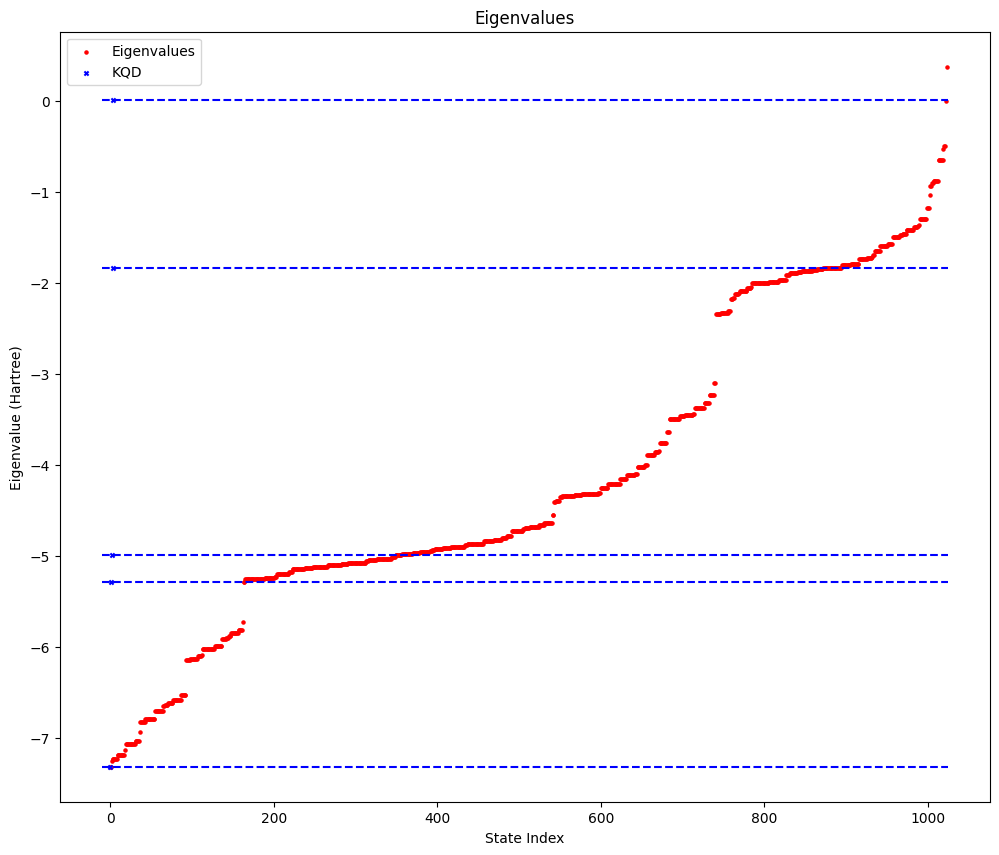

In [85]:
import matplotlib.pyplot as plt
import numpy as np


states = np.arange(len(exact_eva))  # Create state indices (0, 1, 2, ...)
kstate = np.arange(len(eigenvalues))

# Create a scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(states, exact_eva, color="red", label="Eigenvalues", marker="o", s=5)
plt.scatter(kstate, eigenvalues, color="blue", label="KQD", marker="x", s=9)
# Add labels and title
for val in eigenvalues:
    plt.hlines(y=val, xmin=-10, xmax=1024, colors='blue', linestyles='--', linewidth=1.5)

plt.xlabel("State Index")
plt.ylabel("Eigenvalue (Hartree)")
plt.title("Eigenvalues")
# plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [86]:
eigenvalues

array([-7.31583655, -5.28870908, -4.98727736, -1.83885172,  0.01163877])

In [87]:
from scipy.linalg import norm
# Here 10 is the number of spin orbitals to used in our calculation

psi_i = Statevector([0] *(2**10))
# print(norm(eigenvectors[0]))
for i in range(k):
    evolved_statevector = statevector.evolve(U)
    psi_i += eigenvectors[0][i] / norm(eigenvectors[0]) * evolved_statevector
print("Unnormalised state:", psi_i.data)
print("Norm of state:", abs(psi_i.inner(psi_i.conjugate())))
print("Ground state energy calculate from state:", psi_i.expectation_value(qubit_hamiltonian)/abs(psi_i.inner(psi_i.conjugate())))

Unnormalised state: [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
Norm of state: 0.9991361576776318
Ground state energy calculate from state: (-7.315525981281087+0j)


In [88]:
psi_norm = abs(psi_i.inner(psi_i.conjugate()))
gs = psi_i/(psi_norm)**0.5
print("Normalised ground state:",gs.data)
print("Ground state energy:",gs.expectation_value(qubit_hamiltonian))
print(abs(gs.inner(gs.conjugate())))

Normalised ground state: [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
Ground state energy: (-7.315525981281091+0j)
1.0


In [89]:
gs_state = gs.to_dict()
gs_state

{'0000100011': (0.9999954630102624-0.003012301261628546j)}

In [90]:
eigenvalues

array([-7.31583655, -5.28870908, -4.98727736, -1.83885172,  0.01163877])

In [91]:
y = gs_state["0000100011"]
y

(0.9999954630102624-0.003012301261628546j)

In [92]:
from pyscf import gto, scf, fci

# Step 1: Define the lithium atom
mol = gto.M(
    atom='Li 0 0 0',  # Lithium atom at origin
    basis='sto-3g',   # Basis set (use a small basis set for FCI for efficiency)
    spin=1,           # 2S = spin multiplicity - 1, Li has one unpaired electron
    charge=0          # Neutral atom
)


In [97]:
# Step 2: Perform HF calculation as the starting point
hf = scf.RHF(mol)
hf_energy = hf.kernel()
print(f"Ground-state energy from Hartree-Fock (Hartree): {hf_energy}")

# Step 3: Perform FCI calculation for ground and excited states
cisolver = fci.FCI(mol, hf.mo_coeff)  # FCI solver
fci_energies, fci_wavefunctions = cisolver.kernel(nroots=100)  # Solve for multiple roots

# Step 4: Print FCI energies
print("Energies from FCI (Hartree):")
for i, energy in enumerate(fci_energies):
    print(f"  State {i + 1}: {energy}")

converged SCF energy = -7.31552598128109
Ground-state energy from Hartree-Fock (Hartree): -7.315525981281089
Energies from FCI (Hartree):
  State 1: -7.315836552850645
  State 2: -7.230481653125957
  State 3: -7.230481653125949
  State 4: -7.230481653125942
  State 5: -5.288723521383985
  State 6: -5.243870403763628
  State 7: -5.243870403763624
  State 8: -5.243870403763618
  State 9: -5.198357337589828
  State 10: -5.198357337589818
  State 11: -5.198357337589814
  State 12: -5.124414719552961
  State 13: -5.124414719552955
  State 14: -5.124414719552952
  State 15: -5.104063756009614
  State 16: -5.10406375600961
  State 17: -5.1040637560096025
  State 18: -5.098925547464459
  State 19: -5.098925547464451
  State 20: -5.098925547464449
  State 21: -5.082106346445229
  State 22: -5.082106346445223
  State 23: -5.082106346445223
  State 24: -5.082106346445221
  State 25: -5.082106346445219
  State 26: -4.987278547591807
  State 27: -1.9983944121683848
  State 28: -1.9983944121683845
 

In [94]:
eigenvalues

array([-7.31583655, -5.28870908, -4.98727736, -1.83885172,  0.01163877])